In [1]:
from agent_framework.openai import OpenAIChatClient
from agent_framework import ChatMessage, DataContent, Role, TextContent,WorkflowBuilder,  WorkflowEvent,WorkflowViz

In [2]:

import os
import base64
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
chat_client = OpenAIChatClient(base_url=os.environ.get("GITHUB_ENDPOINT"), api_key=os.environ.get("GITHUB_TOKEN"), ai_model_id="gpt-4o" )

In [5]:
SalesAgentName = "Sales-Agent"
SalesAgentInstructions = "You are my furniture sales consultant, you can find different furniture elements from the pictures and give me a purchase suggestion"

In [6]:
PriceAgentName = "Price-Agent"
PriceAgentInstructions = """You are a furniture pricing specialist and budget consultant. Your responsibilities include:
        1. Analyze furniture items and provide realistic price ranges based on quality, brand, and market standards
        2. Break down pricing by individual furniture pieces
        3. Provide budget-friendly alternatives and premium options
        4. Consider different price tiers (budget, mid-range, premium)
        5. Include estimated total costs for room setups
        6. Suggest where to find the best deals and shopping recommendations
        7. Factor in additional costs like delivery, assembly, and accessories
        8. Provide seasonal pricing insights and best times to buy
        Always format your response with clear price breakdowns and explanations for the pricing rationale."""

In [7]:
QuoteAgentName = "Quote-Agent"
QuoteAgentInstructions = """You are a assistant that create a quote for furniture purchase.
        1. Create a well-structured quote document that includes:
        2. A title page with the document title, date, and client name
        3. An introduction summarizing the purpose of the document
        4. A summary section with total estimated costs and recommendations
        5. Use clear headings, bullet points, and tables for easy readability
        6. All quotes are presented in markdown form"""

In [8]:
sales_agent   = chat_client.create_agent(
        instructions=(
           SalesAgentInstructions
        ),
        name=SalesAgentName,
    )

price_agent = chat_client.create_agent(
        instructions=(
            PriceAgentInstructions
        ),
        name=PriceAgentName,
    )

quote_agent = chat_client.create_agent(
        instructions=(
            QuoteAgentInstructions
        ),
        name=QuoteAgentName,
    )


In [9]:
workflow = WorkflowBuilder().set_start_executor(sales_agent).add_edge(sales_agent, price_agent).add_edge(price_agent, quote_agent).build()

In [10]:
print("Generating workflow visualization...")
viz = WorkflowViz(workflow)
# Print out the mermaid string.
print("Mermaid string: \n=======")
print(viz.to_mermaid())
print("=======")
# Print out the DiGraph string.
print("DiGraph string: \n=======")
print(viz.to_digraph())
print("=======")
svg_file = viz.export(format="svg")
print(f"SVG file saved to: {svg_file}")

Generating workflow visualization...
Mermaid string: 
flowchart TD
  Sales_Agent["Sales-Agent (Start)"];
  Price_Agent["Price-Agent"];
  Quote_Agent["Quote-Agent"];
  Sales_Agent --> Price_Agent;
  Price_Agent --> Quote_Agent;
DiGraph string: 
digraph Workflow {
  rankdir=TD;
  node [shape=box, style=filled, fillcolor=lightblue];
  edge [color=black, arrowhead=vee];

  "Sales-Agent" [fillcolor=lightgreen, label="Sales-Agent\n(Start)"];
  "Price-Agent" [label="Price-Agent"];
  "Quote-Agent" [label="Quote-Agent"];
  "Sales-Agent" -> "Price-Agent";
  "Price-Agent" -> "Quote-Agent";
}
SVG file saved to: C:\Users\kinfeylo\AppData\Local\Temp\tmpoe65c8_1.svg


In [11]:
class DatabaseEvent(WorkflowEvent): ...

Attempting to display SVG file at: C:\Users\kinfeylo\AppData\Local\Temp\tmpoe65c8_1.svg


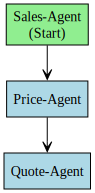

In [12]:
# Display the exported workflow SVG inline in the notebook

from IPython.display import SVG, display, HTML
import os

print(f"Attempting to display SVG file at: {svg_file}")

if svg_file and os.path.exists(svg_file):
    try:
        # Preferred: direct SVG rendering
        display(SVG(filename=svg_file))
    except Exception as e:
        print(f"⚠️ Direct SVG render failed: {e}. Falling back to raw HTML.")
        try:
            with open(svg_file, "r", encoding="utf-8") as f:
                svg_text = f.read()
            display(HTML(svg_text))
        except Exception as inner:
            print(f"❌ Fallback HTML render also failed: {inner}")
else:
    print("❌ SVG file not found. Ensure viz.export(format='svg') ran successfully.")

In [13]:
image_path = "../imgs/home.png"
with open(image_path, "rb") as image_file:
    image_b64 = base64.b64encode(image_file.read()).decode()
image_uri = f"data:image/png;base64,{image_b64}"


In [14]:
message = ChatMessage(
        role=Role.USER,
        contents=[
            TextContent(text="Please find the relevant furniture according to the image and give the corresponding price for each piece of furniture"),
            DataContent(uri=image_uri, media_type="image/png")
        ]
)

In [15]:
result=''
async for event in workflow.run_stream(message):
    if isinstance(event, DatabaseEvent):
        print(f"{event}")
    if isinstance(event, WorkflowEvent):
        result += str(event.data)

In [16]:
result.replace("None", "")

"Based on the living room setup shown in the image, here is a breakdown of the furniture items along with corresponding purchase suggestions and approximate indicative prices. Prices may vary depending on sellers and locations:\n\n---\n\n1. **Modern TV Stand/Console Table**\n   - **Features:** Low-profile, light wood finish, mid-century modern design with storage compartments.\n   - **Price Range:** $150 - $300.\n\n2. **Flat-Screen TV** (Accessory to complement the TV stand)\n   - **Suggestion:** Approx. 55-inch slim smart TV.\n   - **Price Range:** $400 - $800.\n\n3. **Sectional Sofa**\n   - **Features:** White fabric upholstery, modern style, minimalist design, blue and white accent pillows.\n   - **Price Range:** $600 - $1,200.\n\n4. **Accent Pillows**\n   - **Details:** Mixture of blue, white, and patterned designs to complement the sofa.\n   - **Price Range:** $10 - $30 per pillow.\n\n5. **Round Coffee Table**\n   - **Features:** Light wood base with a marble or faux-marble tablet